# Benford's Law in daily new Coronavirus cases

I learnt about Benford's Law a couple of days ago. It says that, as strange as it sounds, the frequency distribution of leading digits in many real-life sets of numerical data is non-uniform. Not only it is non-uniform, but it actually follows this distribution:

<img src="../Benfords-Law.jpg" width="200" height="120"> 

I couldn't believe it. This is supposed to hold for any type of real-life data, regardless of the unit. Sounds absurd, but it is widely used in different fields, from detecting deep fakes to cooked accounting books. So I decided to do a little test. I downloaded the daily new Coronavirus cases for each individual country. Let's see what we find:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset, which I downloaded from *Our World in Data*: https://ourworldindata.org/coronavirus-source-data

In [15]:
df = pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


We have over 35k observations:

In [14]:
np.shape(df)

(35717, 36)

Let's remove NAs and zeros:

In [17]:
# Removing NAs
df = df.dropna(subset=['new_cases'])

# Keeping only positive values
df = df[df.new_cases > 0]

Now let's create a `Benford` column using the `apply` pandas method to extract the leading non-zero digit. 

In [18]:
df['Benford'] = df.apply(lambda row: int(str(row.new_cases).replace('0','').replace('.','')[0]), axis = 1)

Let's extract the results in another dataframe and format them:

In [19]:
benfords_law = round((df.Benford.value_counts() / len(df.Benford))*100,2)

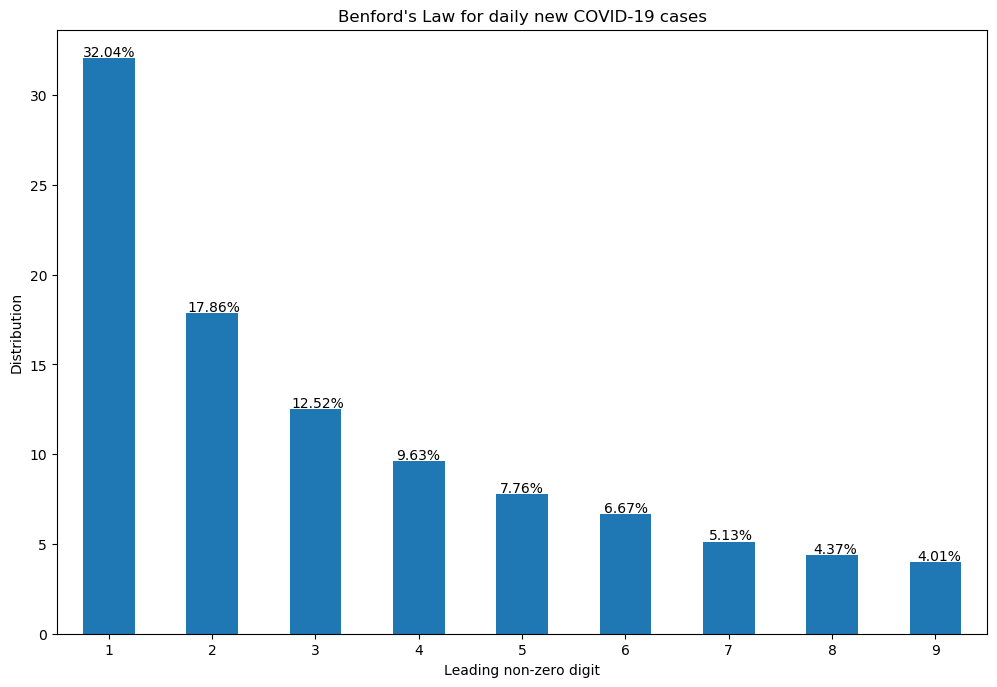

In [20]:
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
ax = benfords_law.plot.bar(rot = 0, title = "Benford's Law for daily new COVID-19 cases");
ax.set_xlabel("Leading non-zero digit")
ax.set_ylabel("Distribution")
for p in ax.patches:
    ax.annotate(str(p.get_height()) + "%", (p.get_x() * 1.01, p.get_height() + 0.1))
fig.savefig('benfords.png')